# Relatório 1
Bianca Nunes Coelho

##Bibliotecas

In [233]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

## Funções e Métodos

In [261]:
##FUNÇÃO QUESTÃO 1
f_ex1 = lambda x: (x**4)-2*(x**3)-4*(x**2)+4*x+4

##FUNÇÃO QUESTÃO 2 
f_ex2 = lambda x: (x**5)-(10/9)*(x**3)+(5/21)*x
  ##Função e derivada para o Método Newton-Raphson
y = Symbol('y')
fex2 = (y**5)-(10/9)*(y**3)+(5/21)*y
df1_ex2 = fex2.diff(y)

##FUNÇÃO QUESTÃO 3
f_ex3 = lambda x: math.log(x**2)-0.7

##FUNÇÃO QUESTÃO 4
f_ex4 = lambda x: (x**3)-6*(x**2)+11*x-6.1
  ##Função e derivada para o Método Newton-Raphson
y = Symbol('y')
fex4 = (y**3)-6*(y**2)+11*y-(6.1)
d4 = 3*(y**2) - 12*y + 11

###Método da Secante

In [235]:
#Método da Secante
# f = função
# x0 = aproximação inicial
# x1 = aproximação inicial
# e = tolerância
# N = número de iterações

def secante(f,x0,x1,e,N):
   
   if(math.fabs(f(x0)) < e):
     x = x0
     return x

   if(math.fabs(x1) < e) or (math.fabs(x1 - x0) < e):
      x = x1
      return x

   k = 0
   if N == 0:

    while( math.fabs(f(x0)) > e ):
        x2 = x1 -( (f(x1)/(f(x1) - f(x0))) * (x1-x0) )

        print(f'k: {k} | x: {x0:,.10f} |')

        if(math.fabs(x2) < e) or (math.fabs(x2 - x1) < e):
          x = x2
          return x
        else:
          x0 = x1
          x1 = x2
      
        k = k + 1
    
   else:
      while(k <= N):
        x2 = x1 -( (f(x1)/(f(x1) - f(x0))) * (x1-x0) )

        print(f'k: {k} | x: {x0:,.10f} |')

        if(math.fabs(x2) < e) or (math.fabs(x2 - x1) < e):
          x = x2
          return x
        else:
          x0 = x1
          x1 = x2
      
        k = k + 1

###Método de Newton-Raphson

In [254]:
#Método de Newton-Raphson
# f = função
# df1 = primeira derivada
# x0 = aproximação inicial
# e = tolerância
# N = número de iterações

def NR(f,df1,x0,e, N):
    if ( math.fabs(f.subs({y: x0})) < e):
       x = x0
       return x
    
    k = 0

    if N == 0:
      while(  math.fabs(f.subs({y: x0})) > e ):
          x1 = x0 - ( f.subs({y:x0}) / df1.subs({y:x0}))

          print(f'k: {k} | x: {x0:,.8f} | f(x): {f.subs({y: x0}):,.8f}')

          if( math.fabs(f.subs({y: x1})) < e or math.fabs(x1 - x0) < e):
            x = x1
            return x
          else:
            x0 = x1
        
          k = k + 1
    else:
       while( k <= N ):
          x1 = x0 - ( f.subs({y:x0}) / df1.subs({y:x0}))

          print(f'k: {k} | x: {x0:,.8f} | f(x): {f.subs({y: x0}):,.8f}')

          if( math.fabs(f.subs({y: x1})) < e or math.fabs(x1 - x0) < e):
            x = x1
            return x
          else:
            x0 = x1
        
          k = k + 1

### Método de Bisseção

In [237]:
# Método de Bisseção
# [a,b] = intervalo
# e = tolerância de erro
# N = número de iterações
# f = função

def bissecao(a, b, f, e, N):
    if ((b - a) < e):
      x = (a + b)/2
      return x
    
    k = 0
    
    if N == 0:

      while((b - a) > e):
  
          M = f(a)
          x = (a + b)/2

          print(f'|k: {k}|a : {a} |b : {b} |x : {x} |f(x) : {f(x)} |f(a) : {M} |')

          if ((M * f(x)) > 0 ):
              a = x
              if((b - a) < e):
                x = (a + b)/2
                return x
          else:
              b = x    
          k = k + 1
    else:
       while(k <= N):
  
          M = f(a)
          x = (a + b)/2

          print(f'|k: {k}|a : {a} |b : {b} |x : {x} |f(x) : {f(x)} |f(a) : {M} |')

          if ((M * f(x)) > 0 ):
              a = x
              if((b - a) < e):
                x = (a + b)/2
                return x
          else:
              b = x    
          k = k + 1

### Método da Falsa Posição

In [238]:
# Método da Falsa Posição
# [a,b] = intervalo
# e1 , e2 = tolerância de erro
# N = número de iterações
# f = função

def falsa_posicao(f,a,b,e,N):

    if( (b - a) < e ):
      x = (a*f(b) - b*f(a)) / (f(b) - f(a))
      return x
    
    k = 0

    if N == 0:
      while((b - a) > e):
          M = f(a)
          x = (a*f(b) - b*f(a)) / (f(b) - f(a))
          print(f'k: {k}|a : {a} | b : {b} |x : {x} |f(x) : {f(x)} ')

          if(math.fabs(f(x)) < e):
            x = (a*f(b) - b*f(a)) / (f(b) - f(a))
            return x
        
          if( M * f(x) > 0 ):
              a = x
              if( (b - a) < e ):
                x = (a*f(b) - b*f(a)) / (f(b) - f(a))
                return x
          else:
            b = x
          k = k + 1
    else:
        while(k <= N):
          M = f(a)
          x = (a*f(b) - b*f(a)) / (f(b) - f(a))
          print(f'k: {k}|a : {a} | b : {b} |x : {x} |f(x) : {f(x)} ')

          if(math.fabs(f(x)) < e):
            x = (a*f(b) - b*f(a)) / (f(b) - f(a))
            return x
        
          if( M * f(x) > 0 ):
              a = x
              if( (b - a) < e ):
                x = (a*f(b) - b*f(a)) / (f(b) - f(a))
                return x
          else:
            b = x
          k = k + 1

# QUESTÕES

## QUESTÃO 1

In [239]:
## a) [-2 , -1]

print("BISSEÇÃO")
bissecao(-2,-1,f_ex1,0.01,0)
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,-2,-1,0.01,0)


BISSEÇÃO
|k: 0|a : -2 |b : -1 |x : -1.5 |f(x) : 0.8125 |f(a) : 12 |
|k: 1|a : -1.5 |b : -1 |x : -1.25 |f(x) : -0.90234375 |f(a) : 0.8125 |
|k: 2|a : -1.5 |b : -1.25 |x : -1.375 |f(x) : -0.288818359375 |f(a) : 0.8125 |
|k: 3|a : -1.5 |b : -1.375 |x : -1.4375 |f(x) : 0.1953277587890625 |f(a) : 0.8125 |
|k: 4|a : -1.4375 |b : -1.375 |x : -1.40625 |f(x) : -0.0626668930053711 |f(a) : 0.1953277587890625 |
|k: 5|a : -1.4375 |b : -1.40625 |x : -1.421875 |f(x) : 0.06226259469985962 |f(a) : 0.1953277587890625 |
|k: 6|a : -1.421875 |b : -1.40625 |x : -1.4140625 |f(x) : -0.0012081228196620941 |f(a) : 0.06226259469985962 |
FALSA POSIÇÃO
k: 0|a : -2 | b : -1 |x : -1.0769230769230769 |f(x) : -1.1037428661461437 
k: 1|a : -2 | b : -1.0769230769230769 |x : -1.1546748749519047 |f(x) : -1.0951798970442859 
k: 2|a : -2 | b : -1.1546748749519047 |x : -1.2253713518768288 |f(x) : -0.9731421782915497 
k: 3|a : -2 | b : -1.2253713518768288 |x : -1.283477846020015 |f(x) : -0.7809393493405201 
k: 4|a : -2 | b : 

-1.4130367516267872

In [240]:
## b) [0 , 2]

print("BISSEÇÃO")
bissecao(0,2,f_ex1,0.01,0)

print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,0,2,0.01,0)

BISSEÇÃO
|k: 0|a : 0 |b : 2 |x : 1.0 |f(x) : 3.0 |f(a) : 4 |
|k: 1|a : 1.0 |b : 2 |x : 1.5 |f(x) : -0.6875 |f(a) : 3.0 |
|k: 2|a : 1.0 |b : 1.5 |x : 1.25 |f(x) : 1.28515625 |f(a) : 3.0 |
|k: 3|a : 1.25 |b : 1.5 |x : 1.375 |f(x) : 0.312744140625 |f(a) : 1.28515625 |
|k: 4|a : 1.375 |b : 1.5 |x : 1.4375 |f(x) : -0.1865081787109375 |f(a) : 0.312744140625 |
|k: 5|a : 1.375 |b : 1.4375 |x : 1.40625 |f(x) : 0.0636758804321289 |f(a) : 0.312744140625 |
|k: 6|a : 1.40625 |b : 1.4375 |x : 1.421875 |f(x) : -0.06131833791732788 |f(a) : 0.0636758804321289 |
|k: 7|a : 1.40625 |b : 1.421875 |x : 1.4140625 |f(x) : 0.0012084878981113434 |f(a) : 0.0636758804321289 |
FALSA POSIÇÃO
k: 0|a : 0 | b : 2 |x : 1.0 |f(x) : 3.0 
k: 1|a : 1.0 | b : 2 |x : 1.4285714285714286 |f(x) : -0.11495210329029693 
k: 2|a : 1.0 | b : 1.4285714285714286 |x : 1.4127557160048132 |f(x) : 0.011661728244146907 
k: 3|a : 1.4127557160048132 | b : 1.4285714285714286 |x : 1.4142124173754627 |f(x) : 9.159980422168701e-06 


1.4142124173754627

In [241]:
## c) [2 , 3]
print("BISSEÇÃO")
bissecao(2,3,f_ex1,0.01,0)
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,2,3,0.01,0)

BISSEÇÃO
|k: 0|a : 2 |b : 3 |x : 2.5 |f(x) : -3.1875 |f(a) : -4 |
|k: 1|a : 2.5 |b : 3 |x : 2.75 |f(x) : 0.34765625 |f(a) : -3.1875 |
|k: 2|a : 2.5 |b : 2.75 |x : 2.625 |f(x) : -1.757568359375 |f(a) : -3.1875 |
|k: 3|a : 2.625 |b : 2.75 |x : 2.6875 |f(x) : -0.7956390380859375 |f(a) : -1.757568359375 |
|k: 4|a : 2.6875 |b : 2.75 |x : 2.71875 |f(x) : -0.2474660873413086 |f(a) : -0.7956390380859375 |
|k: 5|a : 2.71875 |b : 2.75 |x : 2.734375 |f(x) : 0.04412466287612915 |f(a) : -0.2474660873413086 |
|k: 6|a : 2.71875 |b : 2.734375 |x : 2.7265625 |f(x) : -0.10315054282546043 |f(a) : -0.2474660873413086 |
FALSA POSIÇÃO
k: 0|a : 2 | b : 3 |x : 2.3636363636363638 |f(x) : -4.090704186872481 
k: 1|a : 2.3636363636363638 | b : 3 |x : 2.5983532353321555 |f(x) : -2.115658919327606 
k: 2|a : 2.5983532353321555 | b : 3 |x : 2.6915716814816615 |f(x) : -0.7268183788905542 
k: 3|a : 2.6915716814816615 | b : 3 |x : 2.7205837999859437 |f(x) : -0.21385589546919803 
k: 4|a : 2.7205837999859437 | b : 3 |x : 

2.7318085663801774

In [242]:
## d) [-1 , 0]
print("BISSEÇÃO")
bissecao(-1,0,f_ex1,0.01,0)
print("FALSA POSIÇÃO")
falsa_posicao(f_ex1,-1,0,0.01,0)

BISSEÇÃO
|k: 0|a : -1 |b : 0 |x : -0.5 |f(x) : 1.3125 |f(a) : -1 |
|k: 1|a : -1 |b : -0.5 |x : -0.75 |f(x) : -0.08984375 |f(a) : -1 |
|k: 2|a : -0.75 |b : -0.5 |x : -0.625 |f(x) : 0.578369140625 |f(a) : -0.08984375 |
|k: 3|a : -0.75 |b : -0.625 |x : -0.6875 |f(x) : 0.2326812744140625 |f(a) : -0.08984375 |
|k: 4|a : -0.75 |b : -0.6875 |x : -0.71875 |f(x) : 0.0680856704711914 |f(a) : -0.08984375 |
|k: 5|a : -0.75 |b : -0.71875 |x : -0.734375 |f(x) : -0.01176828145980835 |f(a) : -0.08984375 |
|k: 6|a : -0.734375 |b : -0.71875 |x : -0.7265625 |f(x) : 0.027943436056375504 |f(a) : -0.01176828145980835 |
FALSA POSIÇÃO
k: 0|a : -1 | b : 0 |x : -0.8 |f(x) : -0.32640000000000047 
k: 1|a : -0.8 | b : 0 |x : -0.7396449704142012 |f(x) : -0.03830582837642105 
k: 2|a : -0.7396449704142012 | b : 0 |x : -0.7326289804173365 |f(x) : -0.0029311682383532656 


-0.7326289804173365

## QUESTÃO 2

In [243]:
## x1 NR x0 = -0.8
print("NEWTON-RAPHSON")
NR(fex2,df1_ex2,-0.8,0.00001,0)

NEWTON-RAPHSON
k: 0 | x: -0.80000000 | f(x): 0.05073270
k: 1 | x: -1.13210308 | f(x): -0.51700556
k: 2 | x: -1.00839185 | f(x): -0.14344336
k: 3 | x: -0.93732902 | f(x): -0.03168335
k: 4 | x: -0.91022701 | f(x): -0.00360372
k: 5 | x: -0.90626058 | f(x): -0.00007046


-0.906179878948179

In [244]:
## x2 B [-0.75,0.25]
print("BISSEÇÃO")
bissecao(-0.75,0.25,f_ex2,0.00001,0)

BISSEÇÃO
|k: 0|a : -0.75 |b : 0.25 |x : -0.25 |f(x) : -0.04313926091269841 |f(a) : 0.05287388392857145 |
|k: 1|a : -0.75 |b : -0.25 |x : -0.5 |f(x) : -0.011408730158730146 |f(a) : 0.05287388392857145 |
|k: 2|a : -0.75 |b : -0.5 |x : -0.625 |f(x) : 0.027090405660962297 |f(a) : 0.05287388392857145 |
|k: 3|a : -0.625 |b : -0.5 |x : -0.5625 |f(x) : 0.007511820111955919 |f(a) : 0.027090405660962297 |
|k: 4|a : -0.5625 |b : -0.5 |x : -0.53125 |f(x) : -0.002211063154160031 |f(a) : 0.007511820111955919 |
|k: 5|a : -0.5625 |b : -0.53125 |x : -0.546875 |f(x) : 0.0026047979998919946 |f(a) : 0.007511820111955919 |
|k: 6|a : -0.546875 |b : -0.53125 |x : -0.5390625 |f(x) : 0.00018281361969588183 |f(a) : 0.0026047979998919946 |
|k: 7|a : -0.5390625 |b : -0.53125 |x : -0.53515625 |f(x) : -0.0010179572793767577 |f(a) : 0.00018281361969588183 |
|k: 8|a : -0.5390625 |b : -0.53515625 |x : -0.537109375 |f(x) : -0.00041849066225799203 |f(a) : 0.00018281361969588183 |
|k: 9|a : -0.5390625 |b : -0.537109375 |

-0.5384712219238281

In [245]:
## x3 FP [-0.25,0.25]
print("FALSA POSIÇÃO")
falsa_posicao(f_ex2,-0.25,0.25,0.00001,0)

FALSA POSIÇÃO
k: 0|a : -0.25 | b : 0.25 |x : 0.0 |f(x) : 0.0 


0.0

In [246]:
## x5 S x0 = 0.8 e x1 = 2
print("SECANTE")
secante(f_ex2,0.8,2,0.00001,0)

SECANTE
k: 0 | x: 0.8000000000 |
k: 1 | x: 2.0000000000 |
k: 2 | x: 0.8025754780 |
k: 3 | x: 0.8051247137 |
k: 4 | x: 1.0953243488 |
k: 5 | x: 0.8390166659 |
k: 6 | x: 0.8639836449 |
k: 7 | x: 0.9293490049 |
k: 8 | x: 0.9009197248 |
k: 9 | x: 0.9055990909 |
k: 10 | x: 0.9061956438 |


0.9061798459349356

## QUESTÃO 3

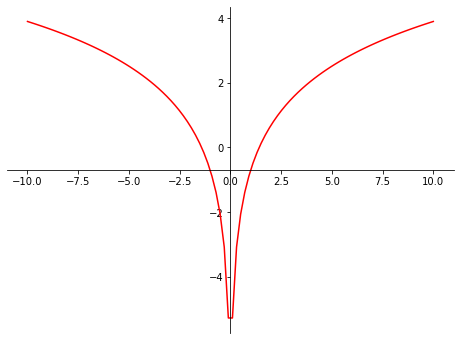

In [247]:
# a) Graficamente

fig, fig1 = plt.subplots(figsize =(8,6))
x = np.linspace(-10,10,100)
y = np.log(x**2)-0.7

fig1.spines['left'].set_position('center') 
fig1.spines['bottom'].set_position('center')
fig1.spines['top'].set_color('none')  
fig1.spines['right'].set_color('none') 

plt.plot(x,y,'r')

In [248]:
# b) B, N = 3 e [0.5,2.0]
bissecao(0.5,2.0,f_ex3,0.1,3)

|k: 0|a : 0.5 |b : 2.0 |x : 1.25 |f(x) : -0.2537128973715804 |f(a) : -2.0862943611198905 |
|k: 1|a : 1.25 |b : 2.0 |x : 1.625 |f(x) : 0.2710156315634017 |f(a) : -0.2537128973715804 |
|k: 2|a : 1.25 |b : 1.625 |x : 1.4375 |f(x) : 0.025810987378736994 |f(a) : -0.2537128973715804 |
|k: 3|a : 1.25 |b : 1.4375 |x : 1.34375 |f(x) : -0.10907157421232816 |f(a) : -0.2537128973715804 |


1.390625

In [249]:
# c) FP, N = 3 e [0.5,2.0]
falsa_posicao(f_ex3,0.5,2.0,0.1,3)

k: 0|a : 0.5 | b : 2.0 |x : 1.6287074482333528 |f(x) : 0.2755734474050122 
k: 1|a : 0.5 | b : 1.6287074482333528 |x : 1.4970143020298659 |f(x) : 0.10694531837203947 
k: 2|a : 0.5 | b : 1.4970143020298659 |x : 1.4483985429092026 |f(x) : 0.04091698581713732 


1.4483985429092026

In [250]:
# d) Compare e explique

## QUESTÃO 4

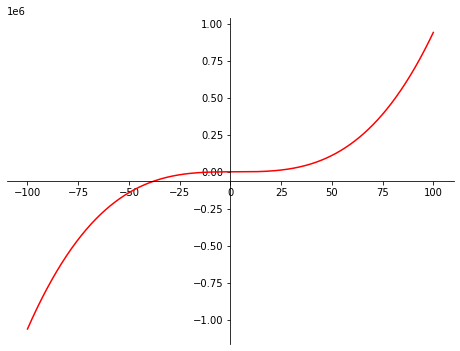

In [259]:
# a) Graficamente
fig, fig1 = plt.subplots(figsize =(8,6))
x = np.linspace(-100,100,1000)
y = (x**3)-6*(x**2)+11*x-6.1

fig1.spines['left'].set_position('center') 
fig1.spines['bottom'].set_position('center')
fig1.spines['top'].set_color('none')  
fig1.spines['right'].set_color('none') 

plt.plot(x,y,'r')

In [262]:
# b) NR, N = 3 e x0 = 3.5
NR(fex4 ,d4 ,3.5 ,0.1 , 3)

k: 0 | x: 3.50000000 | f(x): 1.77500000
k: 1 | x: 3.19130435 | f(x): 0.39940199


3.06869882105510

In [263]:
# c) S, N = 3, x0 = 2.5 e x1 = 3.5
secante(f_ex4,2.5,3.5,0.1,3)

k: 0 | x: 2.5000000000 |
k: 1 | x: 3.5000000000 |
k: 2 | x: 2.7111111111 |
k: 3 | x: 2.8710905035 |


In [264]:
# d) Compare e explique